<a href="https://colab.research.google.com/github/JanOsusky/tensor_flow_basics/blob/main/TF_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Neural network

first time everrrrrrrrrrrrrrrrrrrrrr

In [2]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


# Dataset

MNIST Fashion Dataset

60000 images for training and 10000 images for testing

In [3]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into testing and training

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

60000 images with size 28x28 pixels (784 in total)

In [7]:
type(train_images)

numpy.ndarray

In [11]:
train_images[0,23,23]


194

In [12]:
train_labels[:10] # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<function matplotlib.pyplot.show(close=None, block=None)>

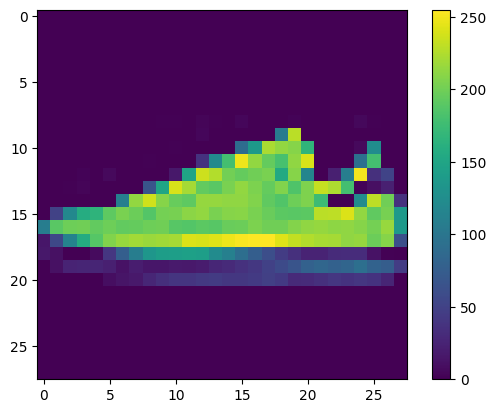

In [19]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show

## Data preprocessing

Scall the grayscale pixels of values 0-255 to be between 0 and 1.

In [20]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Building model


In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)
    keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    # keras.layers.Dense(128, activation='relu'), # hidden layer (3) testing if increase accuracy, prev accuracy with one hidden layer was 0.8782, new one 0.8805 not a big change
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

# Compiling model
Defining tthe loss function, optimizer and metrics we would like to track

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

In [35]:
model.fit(train_images, train_labels, epochs=1) # we pass the data, labels and epochs and watch the magis

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3733 - accuracy: 0.8654


# Evaluating the model

In [36]:
test_lost, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("Test acurracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4037 - accuracy: 0.8538
Test acurracy: 0.8537999987602234


# Make prediction

313/313 [==============================] - 1s 2ms/step
Trouser


<function matplotlib.pyplot.show(close=None, block=None)>

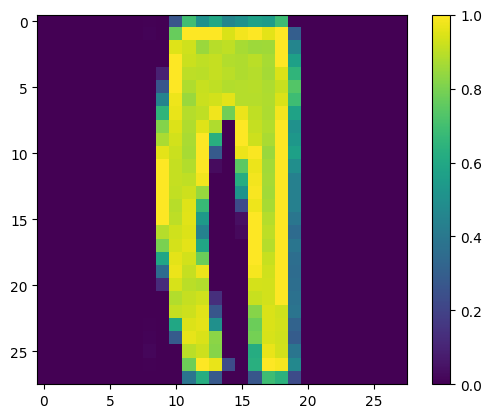

In [45]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show

# Verifying predictions

Pick a number: 34
1/1 [==============================] - 0s 22ms/step


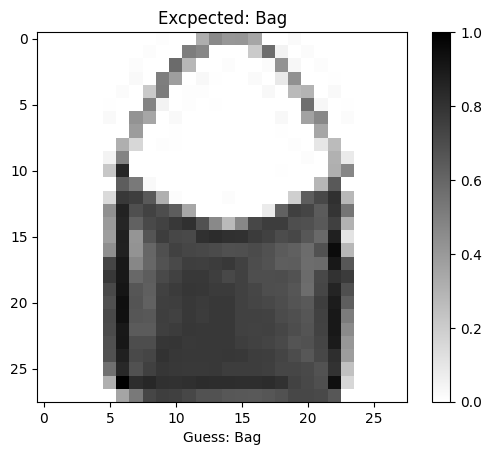

In [56]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
